In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.spatial import distance
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score

In [28]:
df = pd.read_csv('irisdata.csv')
df
#Need to plot petal_length and petal_width

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [29]:
df = pd.read_csv('irisdata.csv')
points = np.array(df.drop(['species'], axis=1))
two_dim_points = np.array(df.drop(['sepal_length', 'sepal_width', 'species'], axis=1))
points
classification = df['species']

In [53]:
#Exercise 1a.
class kMeansImplementation:
    def __init__(self, n_clusters = 3, max_iter = 5, random_state=1):
        '''
        parameters:
        n_clusters: number of clusters
        max_iter: number of iterations before the algorithm stops
        '''
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        
    def kmeans_fit(self, points):
        iteration = 0
        current_sse = None
        previous_sse = None
        done = False
        objective_function = []
        
        centroids = initialize_centroids(points, self.n_clusters)
        
        
        while (done == False):
            classes, new_centroids, current_sse = methods(points, centroids)
            
            objective_function.append(current_sse)
            if(iteration == self.max_iter) or (iteration != 0 and abs(previous_sse - current_sse)<2):
                done = True
                plot_sse(objective_function)
                return classes, new_centroids, current_sse, objective_function
            
            else:
                previous_sse = current_sse
                centroids = new_centroids
                iteration += 1
                done = False
                
    def altered_kmeans_fit(self, points):
        iteration = 0
        current_sse = None
        previous_sse = None
        done = False
        objective_function = []
        
        centroids = initialize_centroids(points, self.n_clusters)
        
        
        while (done == False):
            classes, new_centroids, current_sse = methods(points, centroids)
            plot_blobs(points, classes, new_centroids, iteration)
            
            objective_function.append(current_sse)
            if(iteration == self.max_iter) or (iteration != 0 and abs(previous_sse - current_sse)<0.05):
                done = True
                plot_sse(objective_function)
                plot_decision_boundary(points, classes, new_centroids)
                return classes, new_centroids, current_sse, objective_function
            
            else:
                previous_sse = current_sse
                centroids = new_centroids
                iteration += 1
                done = False
                
        
def initialize_centroids(points, k):
    '''
    parameters:
    points: the data features
    k: number of clusters
    
    
    '''
    shuffled_points = points.copy()
    np.random.shuffle(shuffled_points)
    return shuffled_points[:k, :]

def methods(points, centroids):
    classes = find_closest_centroid(points, centroids)
    new_centroids = reinitialize_centroids(points, centroids, classes)
    sse = error_function(points, new_centroids, classes)
    return classes, new_centroids, sse

def find_closest_centroid(points, centroids):
    classes = [0] * len(points)
    for i in range(len(points)):
        #distance keeps track of the shortest distance
        min_distance = None
        for j in range(len(centroids)):
            new_distance = distance.euclidean(points[i], centroids[j])
            if (min_distance == None or min_distance > new_distance):
                min_distance = new_distance
                classes[i] = j
    return np.array(classes)

def reinitialize_centroids(points, centroids, classes):
    new_centroids = []
    for i in range(len(centroids)):
        new_centroids.append(points[classes==i].mean(axis=0))
    return np.array(new_centroids)

def error_function(points, centroids, classes):
    classes = classes.astype(int)
    sse = np.sum((points - centroids[classes])**2)
    return sse 

#Exercise 1b.
def plot_sse(objective_function):
    domain = list(range(0,len(objective_function)))
    plt.figure()
    plt.plot(domain, objective_function)
    plt.title("Sum of Squared Error at Each Iteration")
    plt.xlabel("Sum of Squared Error")
    plt.ylabel("Iterations")
    plt.show()

#Exercise 1c.
def plot_blobs(points, classes, centroids, iteration):
    x = centroids[:,0]
    y = centroids[:,1]
    title = "Iteration #" + str(iteration)
    plt.figure()
    plt.scatter(points[:, 0], points[:, 1], marker = 'o', c = classes)
    plt.scatter(x,y, marker = 'h', c = 'red')
    plt.title(title)
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.show()
    
#Exercise 1d.    
def plot_decision_boundary(points, classes, centroids):
    x_centroid = np.max(centroids, axis=1)
    y_centroid = np.min(centroids, axis=1)
    
    x_point = np.max(points, axis=1)
    y_point = np.min(points, axis=1)
    
    x_array = np.linspace(min(x_point) - 1, max(x_point)+1, 100)
    y_array = np.linspace(min(y_point) - 1, max(y_point)+1, 100)
    
    graph = np.array([[x, y] for x in x_array for y in y_array])
    
    classification = find_closest_centroid(graph, np.array([x_centroid, y_centroid]).T).reshape(100,100)
    
    plt.figure()
    plt.contourf(x_array, y_array, classification, cmap=plt.cm.RdBu)
    plt.scatter(x_point, y_point, marker = ".", c=classes)
    plt.scatter(x_centroid, y_centroid, marker="o", c="black")
    plt.title("Decision Boundaries")
    plt.show()

### Problem 1a.
Program implements k-means clustering algorithm on the iris data set.

### Problem 1b.
Graph plots the objective function as a function of iteration

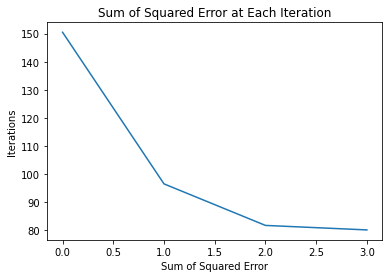

In [54]:
model = kMeansImplementation(n_clusters = 3, max_iter = 100, random_state = 1)
classes, new_centroids, current_sse, objective_function = model.kmeans_fit(points)

In [55]:
adjusted_score = adjusted_rand_score(classification, classes)
score = rand_score(classification, classes)
print(adjusted_score)
print(score)

0.7565319826935709
0.8922595078299776


### Problem 1c.
Graph plots the all the converged cluster centroids overlaid on the data for k=2 and k=3 including the initial, intermediate, and converged clusters.

### Problem 1d.
Graphs include the decision boundaries for the dataset using the coloring of each data point. The final graph provide the decision boundaries for the optimized parameters.

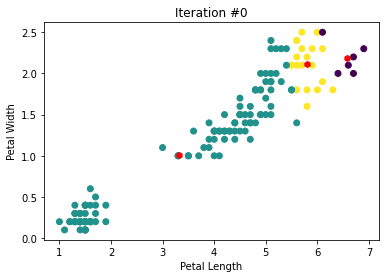

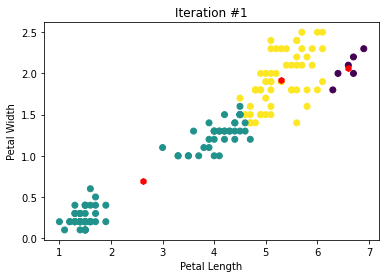

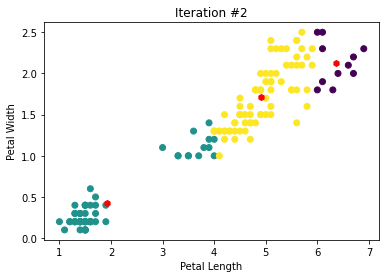

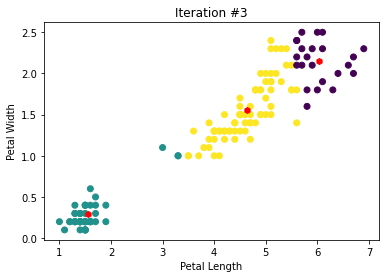

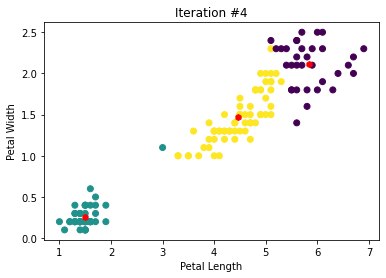

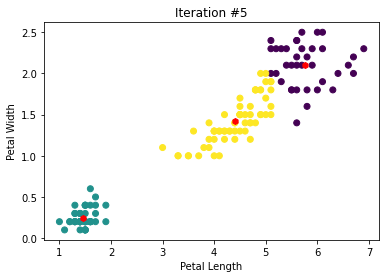

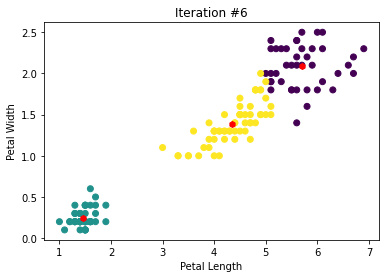

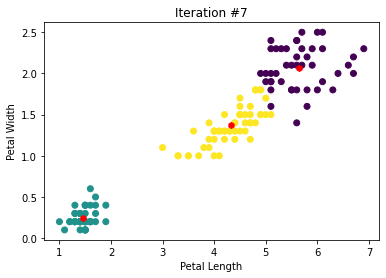

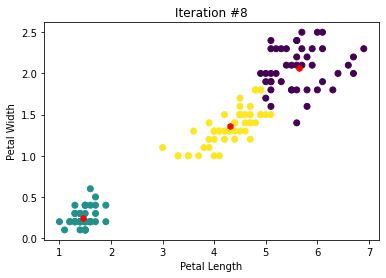

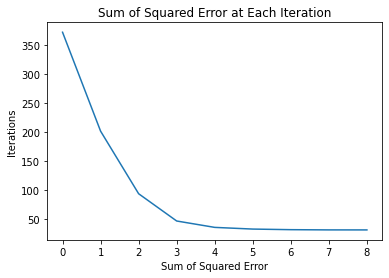

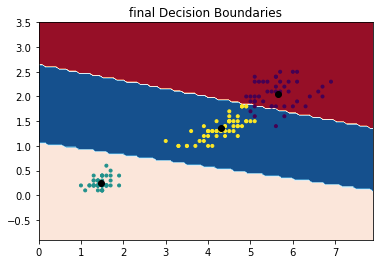

In [56]:
model = kMeansImplementation(n_clusters = 3, max_iter = 100, random_state = 1)
classes, new_centroids, current_sse, objective_function = model.altered_kmeans_fit(two_dim_points)

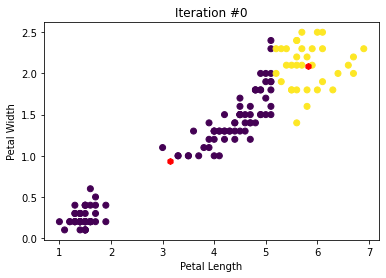

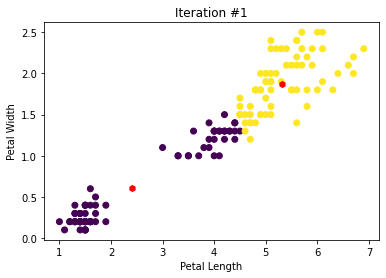

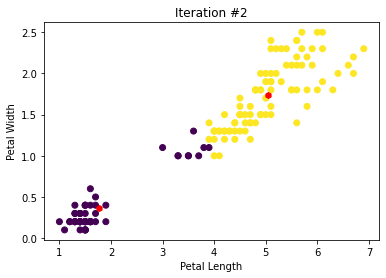

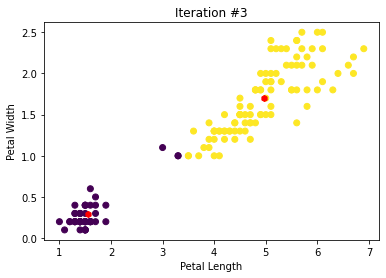

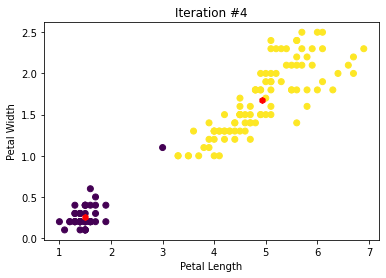

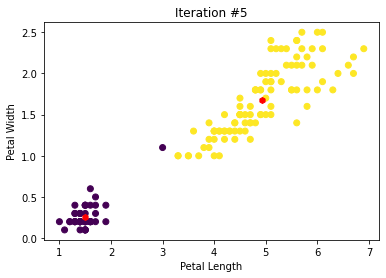

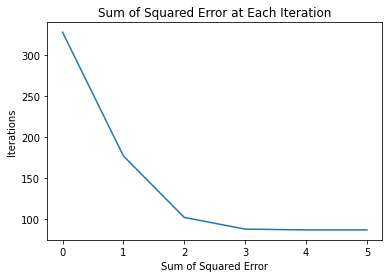

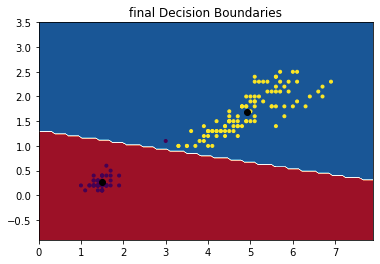

In [57]:
model = kMeansImplementation(n_clusters = 2, max_iter = 100, random_state = 1)
classes, new_centroids, current_sse, objective_function = model.altered_kmeans_fit(two_dim_points)